In [1]:
import pandas as pd
import numpy as np

In [3]:
!pip install quandl
import quandl
#yahoo finance - yfinance(s) - библиотека с данными по площадкам

You should consider upgrading via the 'C:\Users\Vadim\anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
tickers = ['IEF', 'GLD', 'SPY', 'QQQ']

In [ ]:
# quandl.ApiConfig.api_key = key - для загрузки через quandl

In [ ]:
#data = quandl.get_table('SHARADAR/SFP', ticker= [tickers[0]]) # загрузка IEF

In [ ]:
# data.to_csv(ticker+'.csv') # выгрузка данных в файл с названием

In [9]:
data = pd.read_csv('IEF.csv')
daily = {}

In [13]:
path = ['IEF.csv', 'GLD.csv', 'SPY.csv', 'QQQ.csv']

for i, p in enumerate(path):
    data = pd.read_csv(p, index_col = 3)
    data.index = data['date']
    daily[tickers[i]] = data

In [16]:
daily['SPY']

,None,ticker,date,high,low,close,volume,dividends,closeunadj,lastupdated
date,,,,,,,,,,
2021-01-29,0,SPY,2021-01-29,376.670,368.270,370.070,126601429.0,0.0,370.070,2021-01-29
2021-01-28,1,SPY,2021-01-28,381.930,375.890,377.630,93773398.0,0.0,377.630,2021-01-28
2021-01-27,2,SPY,2021-01-27,380.320,372.010,374.410,122536313.0,0.0,374.410,2021-01-27
2021-01-26,3,SPY,2021-01-26,385.850,383.540,383.790,42235069.0,0.0,383.790,2021-01-26
2021-01-25,4,SPY,2021-01-25,384.770,378.460,384.390,70171998.0,0.0,384.390,2021-01-25
...,...,...,...,...,...,...,...,...,...,...
1998-01-07,5803,SPY,1998-01-07,96.719,95.219,96.469,4424200.0,0.0,96.469,2020-08-06
1998-01-06,5804,SPY,1998-01-06,97.281,96.188,96.219,3154900.0,0.0,96.219,2020-08-06
1998-01-05,5805,SPY,1998-01-05,98.438,96.781,97.781,4191800.0,0.0,97.781,2020-08-06


In [17]:
for ticker in tickers:
    print(len(daily[ticker])) # длина датафреймов разная

4659
4077
5808
5510


In [19]:
daily[tickers[0]]

,None,ticker,date,high,low,close,volume,dividends,closeunadj,lastupdated
date,,,,,,,,,,
2021-01-29,0,IEF,2021-01-29,118.79,118.470,118.64,7952081.0,0.0,118.64,2021-01-29
2021-01-28,1,IEF,2021-01-28,119.01,118.715,118.85,5394284.0,0.0,118.85,2021-01-28
2021-01-27,2,IEF,2021-01-27,119.34,119.120,119.16,5764713.0,0.0,119.16,2021-01-27
2021-01-26,3,IEF,2021-01-26,119.06,118.920,119.02,4257174.0,0.0,119.02,2021-01-26
2021-01-25,4,IEF,2021-01-25,119.06,118.710,119.06,5688525.0,0.0,119.06,2021-01-25
...,...,...,...,...,...,...,...,...,...,...
2002-08-05,4654,IEF,2002-08-05,83.92,83.530,83.92,159300.0,0.0,83.92,2018-06-13
2002-08-02,4655,IEF,2002-08-02,83.70,82.900,83.50,120300.0,0.0,83.50,2018-06-13
2002-08-01,4656,IEF,2002-08-01,82.90,82.520,82.86,71400.0,0.0,82.86,2018-06-13


In [38]:
def data_cutting(data, tickers, tables_len):
    min_len = min(tables_len)
    for ticker in tickers:
        data[ticker] = data[ticker].iloc[:min_len,:]
        data[ticker] = data[ticker][::-1][1:]

def tickers_download(tickers, dictionary):
    tables_len = []
    for i, p in enumerate(path):
        data = pd.read_csv(p) # временный таймфрейм
        data.drop('None', axis = 1, inplace = True)
        data.index = pd.to_datetime(data['date']) #важно писать так, через pd.to_datetime, иначе читается как строка, а не DTTM
        daily[tickers[i]] = data
    
        data['pct_change'] = data[::-1]['close'].pct_change()
        length = len(data)
        tables_len.append(length)
    
    data_cutting(daily, tickers, tables_len)

In [39]:
tickers_download(tickers, daily)

In [40]:
daily[tickers[1]]

,ticker,date,open,high,low,close,volume,dividends,closeunadj,lastupdated,pct_change
date,,,,,,,,,,,
2004-11-19,GLD,2004-11-19,44.49,44.920,44.47,44.78,11655300.0,0.0,44.78,2018-06-13,0.009013
2004-11-22,GLD,2004-11-22,44.75,44.970,44.74,44.95,11996000.0,0.0,44.95,2018-06-13,0.003796
2004-11-23,GLD,2004-11-23,44.88,44.920,44.72,44.75,3169200.0,0.0,44.75,2018-06-13,-0.004449
2004-11-24,GLD,2004-11-24,44.93,45.050,44.79,45.05,6105100.0,0.0,45.05,2018-06-13,0.006704
2004-11-26,GLD,2004-11-26,45.25,45.600,45.06,45.29,3097700.0,0.0,45.29,2018-06-13,0.005327
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-25,GLD,2021-01-25,174.82,174.960,173.19,174.05,5934060.0,0.0,174.05,2021-01-25,0.000863
2021-01-26,GLD,2021-01-26,173.98,174.260,173.42,173.62,4671622.0,0.0,173.62,2021-01-26,-0.002471
2021-01-27,GLD,2021-01-27,172.93,173.520,171.66,172.52,9027504.0,0.0,172.52,2021-01-27,-0.006336


In [41]:
df = daily[tickers[0]]

df.resample('M').mean() # группировка данных

,open,high,low,close,volume,dividends,closeunadj,pct_change
date,,,,,,,,
2004-11-30,85.117143,85.242857,84.970000,85.072857,4.665857e+05,0.000000,85.072857,-0.002125
2004-12-31,85.209545,85.355000,85.052727,85.208727,2.747727e+05,0.024227,85.208727,0.000248
2005-01-31,85.156500,85.304000,85.025800,85.201000,3.027700e+05,0.000000,85.201000,0.000437
2005-02-28,85.373684,85.505789,85.210000,85.338947,1.993684e+05,0.013737,85.338947,-0.000880
2005-03-31,83.515909,83.649091,83.355000,83.480455,2.931591e+05,0.010500,83.480455,-0.000302
...,...,...,...,...,...,...,...,...
2020-09-30,121.892857,122.013905,121.753476,121.882143,3.909494e+06,0.004190,121.882143,0.000123
2020-10-31,121.028182,121.155864,120.853864,120.968864,5.637958e+06,0.003591,120.968864,-0.000659
2020-11-30,120.156250,120.266900,120.037800,120.162500,6.714010e+06,0.003800,120.162500,0.000143


<AxesSubplot:xlabel='date'>

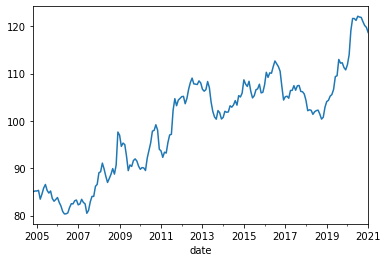

In [43]:
df.resample('M').mean()['close'].plot() # группировка данных

<AxesSubplot:xlabel='date'>

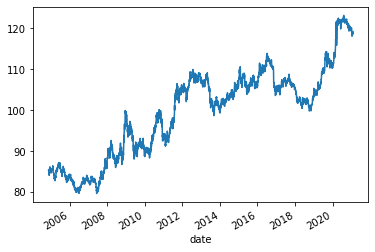

In [42]:
df['close'].plot()

In [52]:
length = len(daily[tickers[0]]) # у всех одинаковая
best_tickers = []

for i in range(length):
    temp_list = []
    for ticker in tickers:
        change = daily[ticker]['pct_change'][i]
        temp_list.append(change)
    max_change = min(temp_list)
    ident = temp_list.index(max_change)
    best_ticker = tickers[ident]
    best_tickers.append(best_ticker)

In [54]:
#"""
#a = [1.1 , 0.99, 0.98]
#min_a = min(a)
#min_a
#a.index(min_a)

In [55]:
best_tickers[:10]

['QQQ', 'IEF', 'GLD', 'IEF', 'IEF', 'IEF', 'GLD', 'IEF', 'GLD', 'SPY']

In [56]:
money = 1
strategy_values = [] # изменение депозита с каждой сделкой

for i in range(1, length):
    ticker = best_tickers[i-1]
    change = daily[ticker]['pct_change'][i] + 1
    money = money * change
    strategy_values.append(money)

<AxesSubplot:>

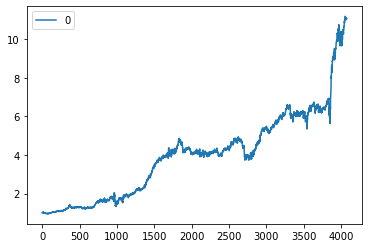

In [57]:
s = pd.DataFrame(strategy_values)
s.plot()

### ДЗ

- yfinance библиотека
- построить свечные графики с помощью plotly на любые акции
- прописать свою стратегию торговли (как выбирать лучший тикер и сколько его держать)